# TextLocalization demo01: Maximally Stable Extremal Regions (MSER)

The Maximally Stable Extremal Regions algorithm (MSER) is a feature detector. 
From an input image extracts a set of connected components that are stable (in terms of area) in a number of consecutive level sets of the image.

The MSER algorithm builds the component tree of the input image and then selects as MSER the branches of the tree that are more stable in terms of area grow.

<img src="images/component_tree.png">

The component tree of an image (in top-left margin of the above figure) can be constructed by thresholding the image by an increasing value from 0 to 255, and linking the obtained connected components from successive level sets in a hierarchy by their inclusion relation.

### Why it's used for scene text candidate detection?

If we assume that text parts (e.g. characters) have a constant color and high contrast to their background then they will be detected for sure as Maximally Stable Extremal Regions with the adequate parameters of the algorithm.

Also, it's a fast algorithm, and can be computed in linear time.

### MSER parameters

The OpenCV MSER_create() call is as follows: 

  **cv2.MSER_create**([, _delta[, _min_area[, _max_area[, _max_variation[, _min_diversity]]]]])
  
  * The **delta** parameter controls how the stability criteria is calculated (how many level sets we take into account). $s = \frac{|R(+\Delta) - R|}{|R|}$
  
  * **min_area** : filters regions that are too small.
  * **max_area** : filters regions that are too big.
  * **max_variation** : filters regions that are too unstable (their shape varies too much).
  * **min_diversity** : filters regions that are too similar to their parent/childs in the MSER tree.
  
One can trivially design more filters for any specific purpose (e.g. aspect ratio, color variance, etc.).

All these parameters are trade-off params. I.e. you can set up the algorithm to return a variable number of regions: from the whole component tree, thus having thousands of connected components and high detection recall; or only the most stable regions, thus having a few good candidates but most probably missing lots of characters.

Let's play a bit with a synthetic image to understand how the delta parameter affects the detector.

In [1]:
# set up Python environment: numpy for numerical routines, and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (10, 10)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

In [2]:
# load OpenCV python module
import cv2

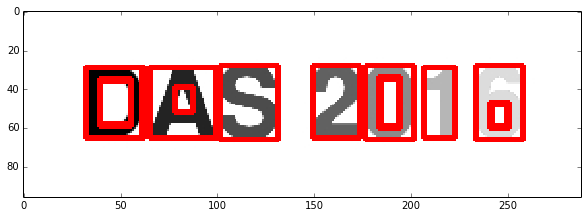

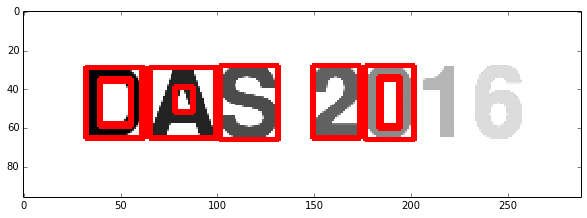

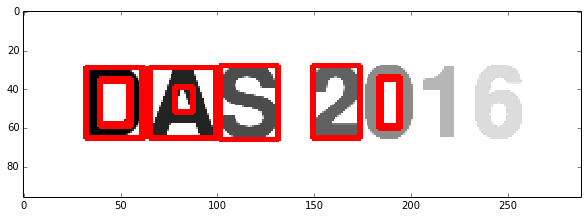

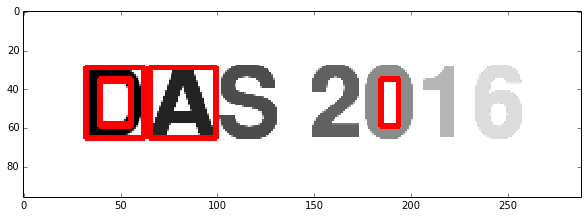

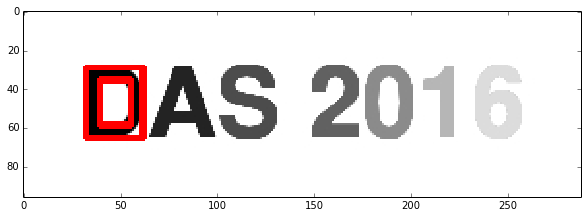

In [3]:
# load the input image
img = cv2.imread('./images/synthetic_sample01.jpg', 0); # grayscale for processing
vis = cv2.imread('./images/synthetic_sample01.jpg');    # BGR for visualizing results

# detect Maximally Stable Estremal Regions (with variable delta parameter)
for delta in (5, 35, 70, 105, 140):
    
    # detect MSER
    mser = cv2.MSER_create(delta)
    regions = mser.detectRegions(img)
    
    # visualize regions' bounding boxes
    vis = cv2.imread('./images/synthetic_sample01.jpg'); # for visualizing results
    rects = [cv2.boundingRect(p) for p in regions[0]]
    # draw bounding boxes
    for rect in rects:
        cv2.rectangle(vis, rect[0:2], (rect[0]+rect[2],rect[1]+rect[3]), (0, 0, 255), 2)
    vis = vis[:,:,::-1] #flip the colors dimension from BGR to RGB
    plt.figure()
    plt.imshow(vis)

### Detect characters in natural scene images

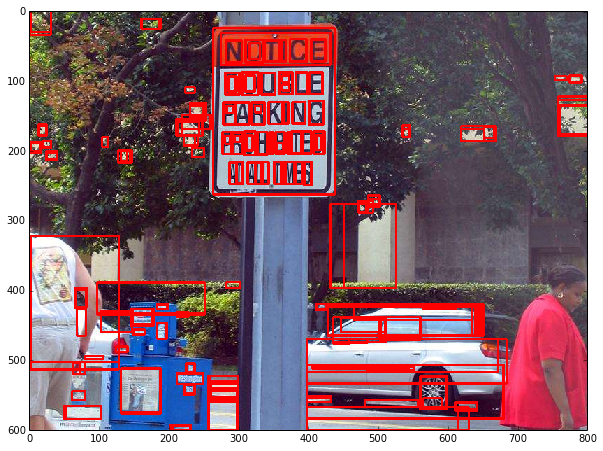

In [4]:
# load the input image
img = cv2.imread('./images/scenetext01.jpg', 0);

# load a grayscale version
vis = cv2.imread('./images/scenetext01.jpg');

# detect Maximally Stable Estremal Regions
mser = cv2.MSER_create(9)
regions = mser.detectRegions(img)

#Visualization

#draw connected components in random colors
#import random
#for region in regions[0]:
#    cv2.drawContours(vis, [region], 0, (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)), 3)

# get regions bounding boxes
rects = [cv2.boundingRect(p) for p in regions[0]]
# draw bounding boxes
for rect in rects:
    cv2.rectangle(vis, rect[0:2], (rect[0]+rect[2],rect[1]+rect[3]), (0, 0, 255), 2)


vis = vis[:,:,::-1] #flip the colors dimension from BGR to RGB
plt.imshow(vis)

### Limitations

There are a number of reasons for which the MSER detector will not detect characters. They stem from the definition of the algorithm and the parameters set-up.

Example: same parameters as before but with blurred text.

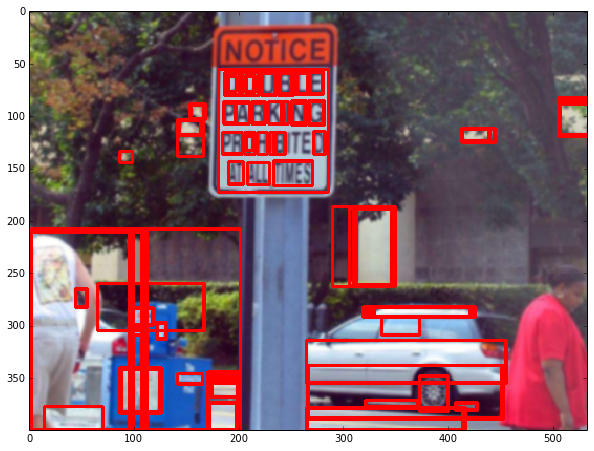

In [5]:
# load the input image
img = cv2.imread('./images/scenetext01_blurred.jpg', 0);

# load a grayscale version
vis = cv2.imread('./images/scenetext01_blurred.jpg');

# detect Maximally Stable Estremal Regions
mser = cv2.MSER_create(9)
regions = mser.detectRegions(img)

#Visualization

#draw connected components in random colors
#import random
#for region in regions[0]:
#    cv2.drawContours(vis, [region], 0, (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)), 3)

# get regions bounding boxes
rects = [cv2.boundingRect(p) for p in regions[0]]
# draw bounding boxes
for rect in rects:
    cv2.rectangle(vis, rect[0:2], (rect[0]+rect[2],rect[1]+rect[3]), (0, 0, 255), 2)


vis = vis[:,:,::-1] #flip the colors dimension from BGR to RGB
plt.imshow(vis)